# Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("twitter_disaster - twitter_disaster.csv")

In [9]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5079 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("twitter_disaster - twitter_disaster.csv")

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumn names and data types:")
print(df.dtypes)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 1: Handling missing values
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 1a: Remove rows with missing target values (assuming 'target' is the target column)
df = df.dropna(subset=['target'])

# Step 1b: Impute missing values for other columns (if necessary)
# Example: Impute missing values in 'text' column with an empty string
df['text'].fillna('', inplace=True)

# Step 2: Removing duplicates
df.drop_duplicates(inplace=True)

# Step 3: Additional cleaning steps as needed...

# Step 10: Save the cleaned dataset if needed
df.to_csv('cleaned_twitter_disaster.csv', index=False)


Shape of the dataset: (7613, 5)

Column names and data types:
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

First few rows of the dataset:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Missing values:
id             0
keyword       61
location    2534
text           0
target         0
dtype: int64


In [15]:
df.shape

(7613, 5)

In [17]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [20]:
distribution = df['target'].value_counts()
distribution

target
0    4342
1    3271
Name: count, dtype: int64

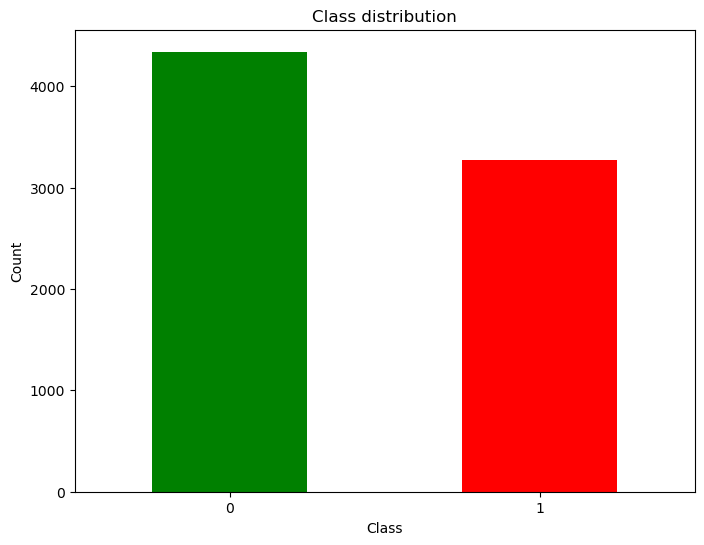

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  
distribution.plot(kind='bar', color=['green', 'red'])  
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [27]:
def clean_text(text):
    # Remove special characters, URLs, and punctuation marks
    cleaned_text = text  # Implement your cleaning logic here
    return cleaned_text

df['clean_text'] = df['text'].apply(clean_text)

In [29]:

df['clean_text'] = df['text'].apply(clean_text)

In [30]:
# Convert text labels into numerical format
df['target'] = df['target'].astype(int)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [38]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)



LogisticRegression()

In [39]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7957977675640184
Precision: 0.78839590443686
Recall: 0.711864406779661
F1 Score: 0.748178137651822


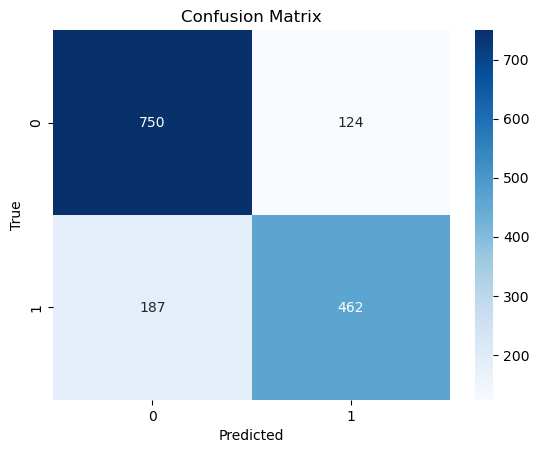

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# HTML code

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Disaster Tweet Classification</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
        }

        .container {
            max-width: 600px;
            margin: 50px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 8px;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
        }

        h1 {
            text-align: center;
            margin-bottom: 30px;
        }

        textarea {
            width: 100%;
            height: 150px;
            margin-bottom: 20px;
            padding: 10px;
            border: 1px solid #ccc;
            border-radius: 5px;
            resize: none;
            font-size: 16px;
        }

        button {
            display: block;
            width: 100%;
            padding: 10px;
            background-color: #007bff;
            color: #fff;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
        }

        .result {
            margin-top: 20px;
        }

        .result p {
            font-size: 18px;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Disaster Tweet Classification</h1>
        <textarea id="tweetInput" placeholder="Enter your tweet here..."></textarea>
        <button onclick="classifyTweet()">Classify Tweet</button>
        <div class="result" id="resultArea"></div>
    </div>

    <script>
        function classifyTweet() {
            var tweet = document.getElementById("tweetInput").value.trim();
            
            if (tweet === "") {
                alert("Please enter a tweet.");
                return;
            }

            // Send tweet data to backend for classification
            // You can use AJAX or fetch API for this

            // For demonstration purposes, display a sample result
            var result = Math.random() >= 0.5 ? "Disaster" : "Non-Disaster";
            document.getElementById("resultArea").innerHTML = "<p>Classification Result: " + result + "</p>";
        }
    </script>
</body>
</html>
